## <span style="color:aquamarine">**KNN Classification on Sklearn Digits Dataset**</span>
- From sklearn.datasets load digits dataset and do following

1. Classify digits (0 to 9) using KNN classifier. You can use different values for k neighbors and need to figure out a value of K that gives you a maximum score. You can manually try different values of K or use gridsearchcv
2. Plot confusion matrix
3. Plot classification report

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
digits=load_digits()

In [2]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [3]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

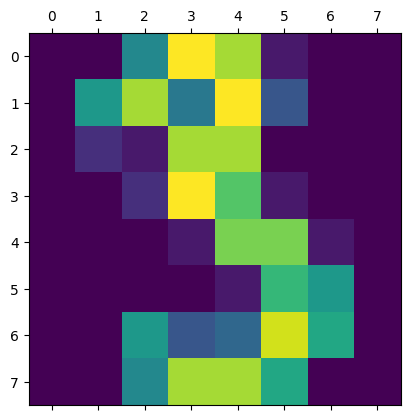

In [4]:
plt.matshow(digits.images[3])

In [5]:
df=pd.DataFrame(digits.data, digits.target)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3, random_state=42)

In [7]:
len(X_train), len(X_test)

(1257, 540)

### <span style="color:limegreen">**Use GridSearchCV to find the best parameter for KNN**</span>

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [9]:
from sklearn.model_selection import GridSearchCV
clf=GridSearchCV(knn,{
    'n_neighbors': [1,5,10,20]
}, cv=5, return_train_score=False)

clf.fit(X_train, y_train)
clf.cv_results_

{'mean_fit_time': array([0., 0., 0., 0.]),
 'std_fit_time': array([0., 0., 0., 0.]),
 'mean_score_time': array([0.04100299, 0.01164613, 0.00918417, 0.00953712]),
 'std_score_time': array([0.06642303, 0.00652561, 0.00752875, 0.00778736]),
 'param_n_neighbors': masked_array(data=[1, 5, 10, 20],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 5},
  {'n_neighbors': 10},
  {'n_neighbors': 20}],
 'split0_test_score': array([0.99206349, 0.98809524, 0.98015873, 0.96031746]),
 'split1_test_score': array([0.98015873, 0.96428571, 0.95634921, 0.93650794]),
 'split2_test_score': array([0.99601594, 0.99203187, 0.97609562, 0.96015936]),
 'split3_test_score': array([0.98406375, 0.97609562, 0.98007968, 0.96015936]),
 'split4_test_score': array([0.98007968, 0.97211155, 0.96812749, 0.9561753 ]),
 'mean_test_score': array([0.98647632, 0.978524  , 0.97216215, 0.95466388]),
 'std_test_score': array([0.0064

In [10]:
df1=pd.DataFrame(clf.cv_results_)[['param_n_neighbors', 'params', 'mean_test_score']]
df1

,param_n_neighbors,params,mean_test_score
0,1,{'n_neighbors': 1},0.986476
1,5,{'n_neighbors': 5},0.978524
2,10,{'n_neighbors': 10},0.972162
3,20,{'n_neighbors': 20},0.954664


In [11]:
clf.best_score_

0.9864763169544046

In [12]:
clf.best_estimator_

KNeighborsClassifier(n_neighbors=1)

**Conclusion: for digits data KNN with n_neighbors=1 gives the best score**

### <span style="color:limegreen">**Confusion Matrix**</span>

In [13]:
y_pred=clf.predict(X_test)
# y_pred

Text(50.722222222222214, 0.5, 'Truth')

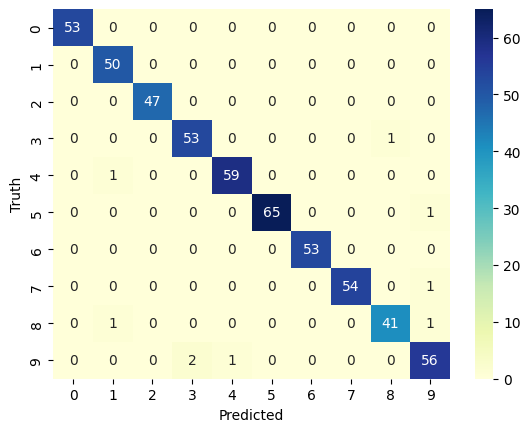

In [14]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel("Truth")

### <span style="color:limegreen">**Classification Report**</span>

In [15]:
from sklearn.metrics import classification_report

print( classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.96      1.00      0.98        50
           2       1.00      1.00      1.00        47
           3       0.96      0.98      0.97        54
           4       0.98      0.98      0.98        60
           5       1.00      0.98      0.99        66
           6       1.00      1.00      1.00        53
           7       1.00      0.98      0.99        55
           8       0.98      0.95      0.96        43
           9       0.95      0.95      0.95        59

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



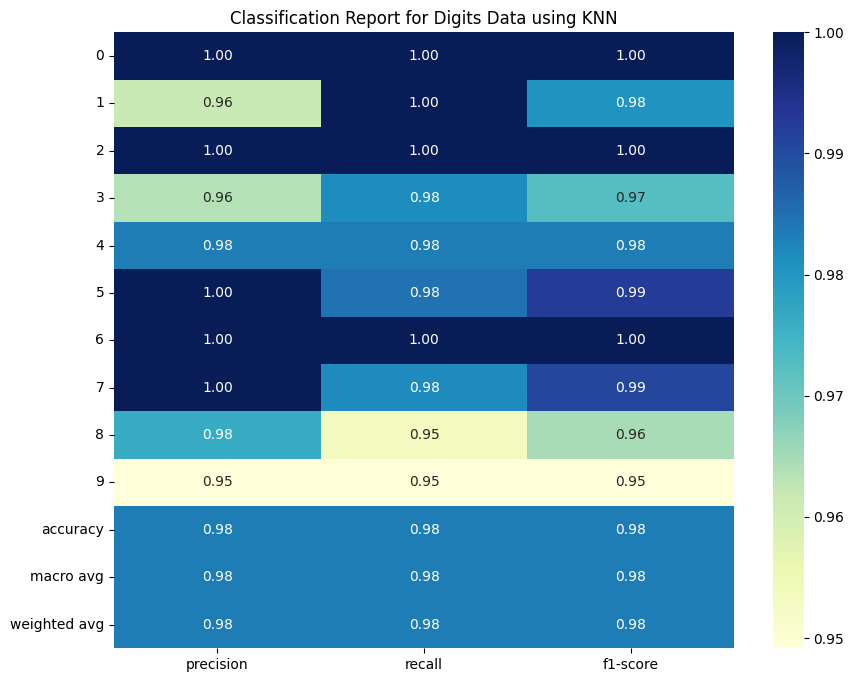

In [16]:
# Generate the classification report as a dictionary
report=classification_report(y_test, y_pred, output_dict=True)

# Convert the dictionary into a Pandas DataFrame
report_df=pd.DataFrame(report).transpose()

# Drop the 'support' column (optional)
report_df=report_df.drop('support', axis=1)

# Plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(report_df, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Classification Report for Digits Data using KNN')
plt.show()